In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook
import matplotlib.cm as cm
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline 



In [2]:
!pip install adjustText
from adjustText import adjust_text


In [3]:
df = pd.read_excel('test2.xlsx')
m2 = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p6_2d') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','G_O-OH','OVER_Cl','Over_OER','preads']]
m2

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,G_O-OH,OVER_Cl,Over_OER,preads
72,p6_2d,4,Ru,-0.340000,0.35,-0.03,2.64,0.38,1.70,1.06,bare
73,p6_2d,4,Mn,0.230000,0.92,0.45,3.41,0.47,1.13,1.26,bare
74,p6_2d,4,Fe,0.360000,1.23,0.52,3.31,0.71,1.00,0.85,bare
75,p6_2d,4,Co,0.610000,2.51,1.01,3.79,1.50,0.75,0.27,bare
76,p6_2d,4,Ni,1.430000,3.92,2.03,4.71,1.89,0.07,0.80,bare
...,...,...,...,...,...,...,...,...,...,...,...
305,p6_2d,4,Pt,0.297506,NaN,NaN,NaN,NaN,1.06,NaN,O
306,p6_2d,4,Au,1.377506,NaN,NaN,NaN,NaN,0.01,NaN,O
307,p6_2d,4,Cr,1.437506,NaN,NaN,NaN,NaN,0.07,NaN,O
308,p6_2d,4,Mo,1.577506,NaN,NaN,NaN,NaN,0.22,NaN,O


In [7]:
bare = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p6_2d') & (df['preads'] == 'bare') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','G_O-OH','OVER_Cl','Over_OER']]
bare = bare[:18]
bare['dissolutionV'] = [0.74,2.18,0.80,1.05,1.22,1.24,np.nan,1.53,2.07,0.59,0.03,0.81,1.64,2.42,1.58,0.49,-0.24,0.16]
bare['formation'] = [-4.30 ,-2.89 ,-3.56 ,-4.09 ,-4.27 ,-1.44 ,-3.27 ,-4.00 ,-2.16 ,1.53,-3.16,-4.28 ,-4.88 ,-4.16 ,0.57 ,-3.01 ,-2.41 ,-4.28 ]

bare = bare.drop(78)


# solvation

bare['G_OOH'] = bare['G_OOH'] -0.3 
bare['G_OH'] = bare['G_OH'] -0.3 


a = list(bare['G_OH']-1.23)
b =list(bare['G_O']-bare['G_OH']-1.23)
c = list(bare['G_OOH']-bare['G_O']-1.23)
d = list(4.92-bare['G_OOH']-1.23)

bare['Over_OER'] = np.max([a,b,c,d],axis=0)

bare['selectivity'] = -( bare['OVER_Cl'] - bare['Over_OER'] )
bare = bare.loc[bare.Over_OER < 2]
bare



,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,G_O-OH,OVER_Cl,Over_OER,dissolutionV,formation,selectivity
72,p6_2d,4,Ru,-0.34,0.35,-0.33,2.34,0.38,1.70,1.35,0.74,-4.30,-0.35
73,p6_2d,4,Mn,0.23,0.92,0.15,3.11,0.47,1.13,0.96,2.18,-2.89,-0.17
74,p6_2d,4,Fe,0.36,1.23,0.22,3.01,0.71,1.00,0.68,0.80,-3.56,-0.32
75,p6_2d,4,Co,0.61,2.51,0.71,3.49,1.50,0.75,0.57,1.05,-4.09,-0.18
76,p6_2d,4,Ni,1.43,3.92,1.73,4.41,1.89,0.07,0.96,1.22,-4.27,0.89
77,p6_2d,4,Cu,1.24,3.94,1.57,4.32,2.07,0.12,1.14,1.24,-1.44,1.02
79,p6_2d,4,Rh,0.59,2.54,0.73,3.57,1.51,0.77,0.58,1.53,-4.00,-0.19
80,p6_2d,4,Pd,1.69,4.79,2.37,4.90,2.12,0.33,1.19,2.07,-2.16,0.86
81,p6_2d,4,Ag,0.84,3.57,1.19,3.98,2.08,0.52,1.15,0.59,1.53,0.63
83,p6_2d,4,Os,-0.23,0.03,-0.34,2.37,0.07,1.59,1.32,0.81,-4.28,-0.27


Text(0, 0.5, 'formation energy (E$_f$, eV)')

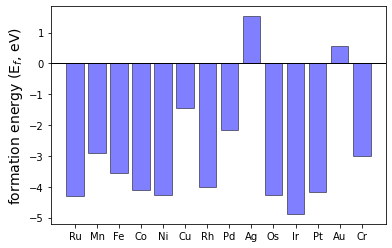

In [8]:
plt.axhline(0, 0,1, color='black', linestyle='solid', linewidth=1)

plt.bar(bare['M'],bare['formation'], color='b',alpha = 0.5, edgecolor = 'black', linewidth = 1)

plt.ylabel('formation energy (E$_f$, eV)', fontsize = 14)

Text(0, 0.5, 'dissolution potential (U$_{diss}$, V)')

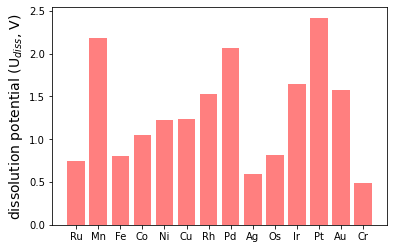

In [9]:
plt.axhline(0, 0,1, color='black', linestyle='solid', linewidth=1)

plt.bar(bare['M'],bare['dissolutionV'], color='red',alpha = 0.5)
plt.ylabel('dissolution potential (U$_{diss}$, V)', fontsize = 14)

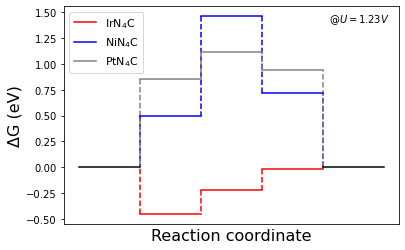

In [16]:


x01 = [0,1]
x12 = [1,2]
x23= [2,3]
x34 = [3,4]
x45 = [4,5]


y = [0,0]

plt.plot(x01,y,color='black')
plt.plot(x45,y,color='black')

Ir12 = [0.78-1.23,0.78-1.23]
Ir23 = [2.24-1.23*2,2.24-1.23*2]
Ir34 = [3.67-1.23*3] * 2


plt.plot(x12,Ir12,color='red',label='IrN$_4$C')
plt.plot(x23,Ir23,color='red')
plt.plot(x34,Ir34,color='red')

plt.vlines(1, 0.78-1.23,0, color='red', linestyle='--')
plt.vlines(2, 2.24-1.23*2,0.78-1.23, color='red', linestyle='--')
plt.vlines(3, 3.67-1.23*3,2.24-1.23*2, color='red', linestyle='--')
plt.vlines(4, 0, 3.67-1.23*3,color='red', linestyle='--')

Ir12 = [1.73-1.23,1.73-1.23]
Ir23 = [3.92-1.23*2,3.92-1.23*2]
Ir34 = [4.41-1.23*3] * 2


plt.plot(x12,Ir12,color='blue',label='NiN$_4$C')
plt.plot(x23,Ir23,color='blue')
plt.plot(x34,Ir34,color='blue')

plt.vlines(1, 1.73-1.23,0, color='blue', linestyle='--')
plt.vlines(2, 3.92-1.23*2,1.73-1.23, color='blue', linestyle='--')
plt.vlines(3, 4.41-1.23*3,3.92-1.23*2, color='blue', linestyle='--')
plt.vlines(4, 0, 4.41-1.23*3,color='blue', linestyle='--')

plt.xlabel('Reaction coordinate', fontsize=16)
plt.ylabel('ΔG (eV)', fontsize=16)



Pt12 = [2.08-1.23] * 2
Pt23 = [3.57-1.23*2] * 2
Pt34 = [4.63-1.23*3] * 2


plt.plot(x12,Pt12,color='gray',label='PtN$_4$C')
plt.plot(x23,Pt23,color='gray')
plt.plot(x34,Pt34,color='gray')

plt.vlines(1, 2.08-1.23,0, color='gray', linestyle='--')
plt.vlines(2, 3.57-1.23*2,2.08-1.23, color='gray', linestyle='--')
plt.vlines(3, 4.63-1.23*3,3.57-1.23*2, color='gray', linestyle='--')
plt.vlines(4, 0, 4.63-1.23*3,color='gray', linestyle='--')

plt.xlabel('Reaction coordinate', fontsize=16)
plt.ylabel('ΔG (eV)', fontsize=16)

plt.text(4.1,1.4,'$@U = 1.23V$')
plt.xticks([])
plt.legend(loc='upper left', fontsize = 11)


#plt.text(2,1.43-1.36+0.03,'$NiN_4C(Cl^-)$')

(-0.8, 0.5)

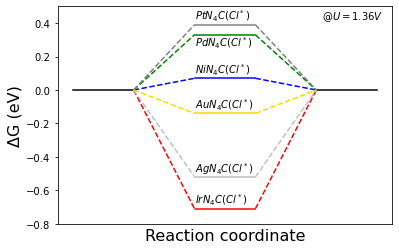

In [17]:
x01 = [0,1]
y = [0,0]
x45 = [4,5]
plt.plot(x01,y,color='black')
plt.plot(x45,y,color='black')

x12 = [1,2]
x34 = [3,4]

x23 = [2,3]

Ni12 = [0,1.43-1.36]
Ni34 = [1.43-1.36,0]
Ni23 = [1.43-1.36,1.43-1.36]
plt.plot(x12,Ni12,'--',color = 'blue')
plt.plot(x34,Ni34,'--',color = 'blue')
plt.plot(x23,Ni23,color = 'blue')
plt.text(2,1.43-1.36+0.03,'$NiN_4C(Cl^*)$')


Ir12 = [0,0.65-1.36]
Ir34 = [0.65-1.36,0]
Ir23 = [0.65-1.36,0.65-1.36]
plt.plot(x12,Ir12,'--',color = 'red')
plt.plot(x34,Ir34,'--',color = 'red')
plt.plot(x23,Ir23,color = 'red')
plt.text(2,0.65-1.36+0.03,'$IrN_4C(Cl^*)$')

Pd12 = [0,1.69-1.36]
Pd34 = [1.69-1.36,0]
Pd23 = [1.69-1.36,1.69-1.36]
plt.plot(x12,Pd12,'--',color = 'green')
plt.plot(x34,Pd34,'--',color = 'green')
plt.plot(x23,Pd23,color = 'green')
plt.text(2,1.69-1.36-0.07,'$PdN_4C(Cl^*)$')

Pt12 = [0,1.75-1.36]
Pt34 = [1.75-1.36,0]
Pt23 = [1.75-1.36,1.75-1.36]
plt.plot(x12,Pt12,'--',color = 'gray')
plt.plot(x34,Pt34,'--',color = 'gray')
plt.plot(x23,Pt23,color = 'gray')
plt.text(2,1.75-1.36+0.03,'$PtN_4C(Cl^*)$')

Au12 = [0,1.22-1.36]
Au34 = [1.22-1.36,0]
Au23 = [1.22-1.36,1.22-1.36]
plt.plot(x12,Au12,'--',color = 'gold')
plt.plot(x34,Au34,'--',color = 'gold')
plt.plot(x23,Au23,color = 'gold')
plt.text(2,1.22-1.36+0.03,'$AuN_4C(Cl^*)$')

Ag12 = [0,0.84-1.36]
Ag34 = [0.84-1.36,0]
Ag23 = [0.84-1.36,0.84-1.36]
plt.plot(x12,Ag12,'--',color = 'silver')
plt.plot(x34,Ag34,'--',color = 'silver')
plt.plot(x23,Ag23,color = 'silver')
plt.text(2,0.84-1.36+0.03,'$AgN_4C(Cl^*)$')


plt.xlabel('Reaction coordinate', fontsize=16)
plt.ylabel('ΔG (eV)', fontsize=16)

plt.text(4.1,0.42,'$@U = 1.36V$')
plt.xticks([])
plt.ylim(-0.8,0.5)


In [12]:
df = bare[['M','OVER_Cl','Over_OER','dissolutionV','formation','selectivity']]
df = df.loc[df.Over_OER < 2]
df

df['OER activity'] = (df['Over_OER']) / (1.57) * 80 + 20
df['CER activity'] = (-df['OVER_Cl'] + 1.70) / (1.70) * 80 + 20
df['Electrochemical stability'] = (df['dissolutionV'] -0.49)/ (2.42-0.49) * 80 + 20
df['Thermodynamic stability'] = (-df['formation'] + 0.57) / (0.57+4.88) * 80 + 20
df['Selectivity'] = (df['selectivity'] +0.48 ) / (1.23+0.48) * 80 + 20
df

,M,OVER_Cl,Over_OER,dissolutionV,formation,selectivity,OER activity,CER activity,Electrochemical stability,Thermodynamic stability,Selectivity
72,Ru,1.70,1.35,0.74,-4.30,-0.35,88.789809,20.000000,30.362694,91.486239,26.081871
73,Mn,1.13,0.96,2.18,-2.89,-0.17,68.917197,46.823529,90.051813,70.788991,34.502924
74,Fe,1.00,0.68,0.80,-3.56,-0.32,54.649682,52.941176,32.849741,80.623853,27.485380
75,Co,0.75,0.57,1.05,-4.09,-0.18,49.044586,64.705882,43.212435,88.403670,34.035088
76,Ni,0.07,0.96,1.22,-4.27,0.89,68.917197,96.705882,50.259067,91.045872,84.093567
77,Cu,0.12,1.14,1.24,-1.44,1.02,78.089172,94.352941,51.088083,49.504587,90.175439
79,Rh,0.77,0.58,1.53,-4.00,-0.19,49.554140,63.764706,63.108808,87.082569,33.567251
80,Pd,0.33,1.19,2.07,-2.16,0.86,80.636943,84.470588,85.492228,60.073394,82.690058
81,Ag,0.52,1.15,0.59,1.53,0.63,78.598726,75.529412,24.145078,5.908257,71.929825
83,Os,1.59,1.32,0.81,-4.28,-0.27,87.261146,25.176471,33.264249,91.192661,29.824561


In [14]:
df = df[['M', 'OER activity','CER activity','Electrochemical stability','Thermodynamic stability','Selectivity']]
df.reset_index(inplace=True, drop=False)
df = df[['M', 'OER activity','CER activity','Electrochemical stability','Thermodynamic stability','Selectivity']]
df

,M,OER activity,CER activity,Electrochemical stability,Thermodynamic stability,Selectivity
0,Ru,88.789809,20.000000,30.362694,91.486239,26.081871
1,Mn,68.917197,46.823529,90.051813,70.788991,34.502924
2,Fe,54.649682,52.941176,32.849741,80.623853,27.485380
3,Co,49.044586,64.705882,43.212435,88.403670,34.035088
4,Ni,68.917197,96.705882,50.259067,91.045872,84.093567
5,Cu,78.089172,94.352941,51.088083,49.504587,90.175439
6,Rh,49.554140,63.764706,63.108808,87.082569,33.567251
7,Pd,80.636943,84.470588,85.492228,60.073394,82.690058
8,Ag,78.598726,75.529412,24.145078,5.908257,71.929825
9,Os,87.261146,25.176471,33.264249,91.192661,29.824561


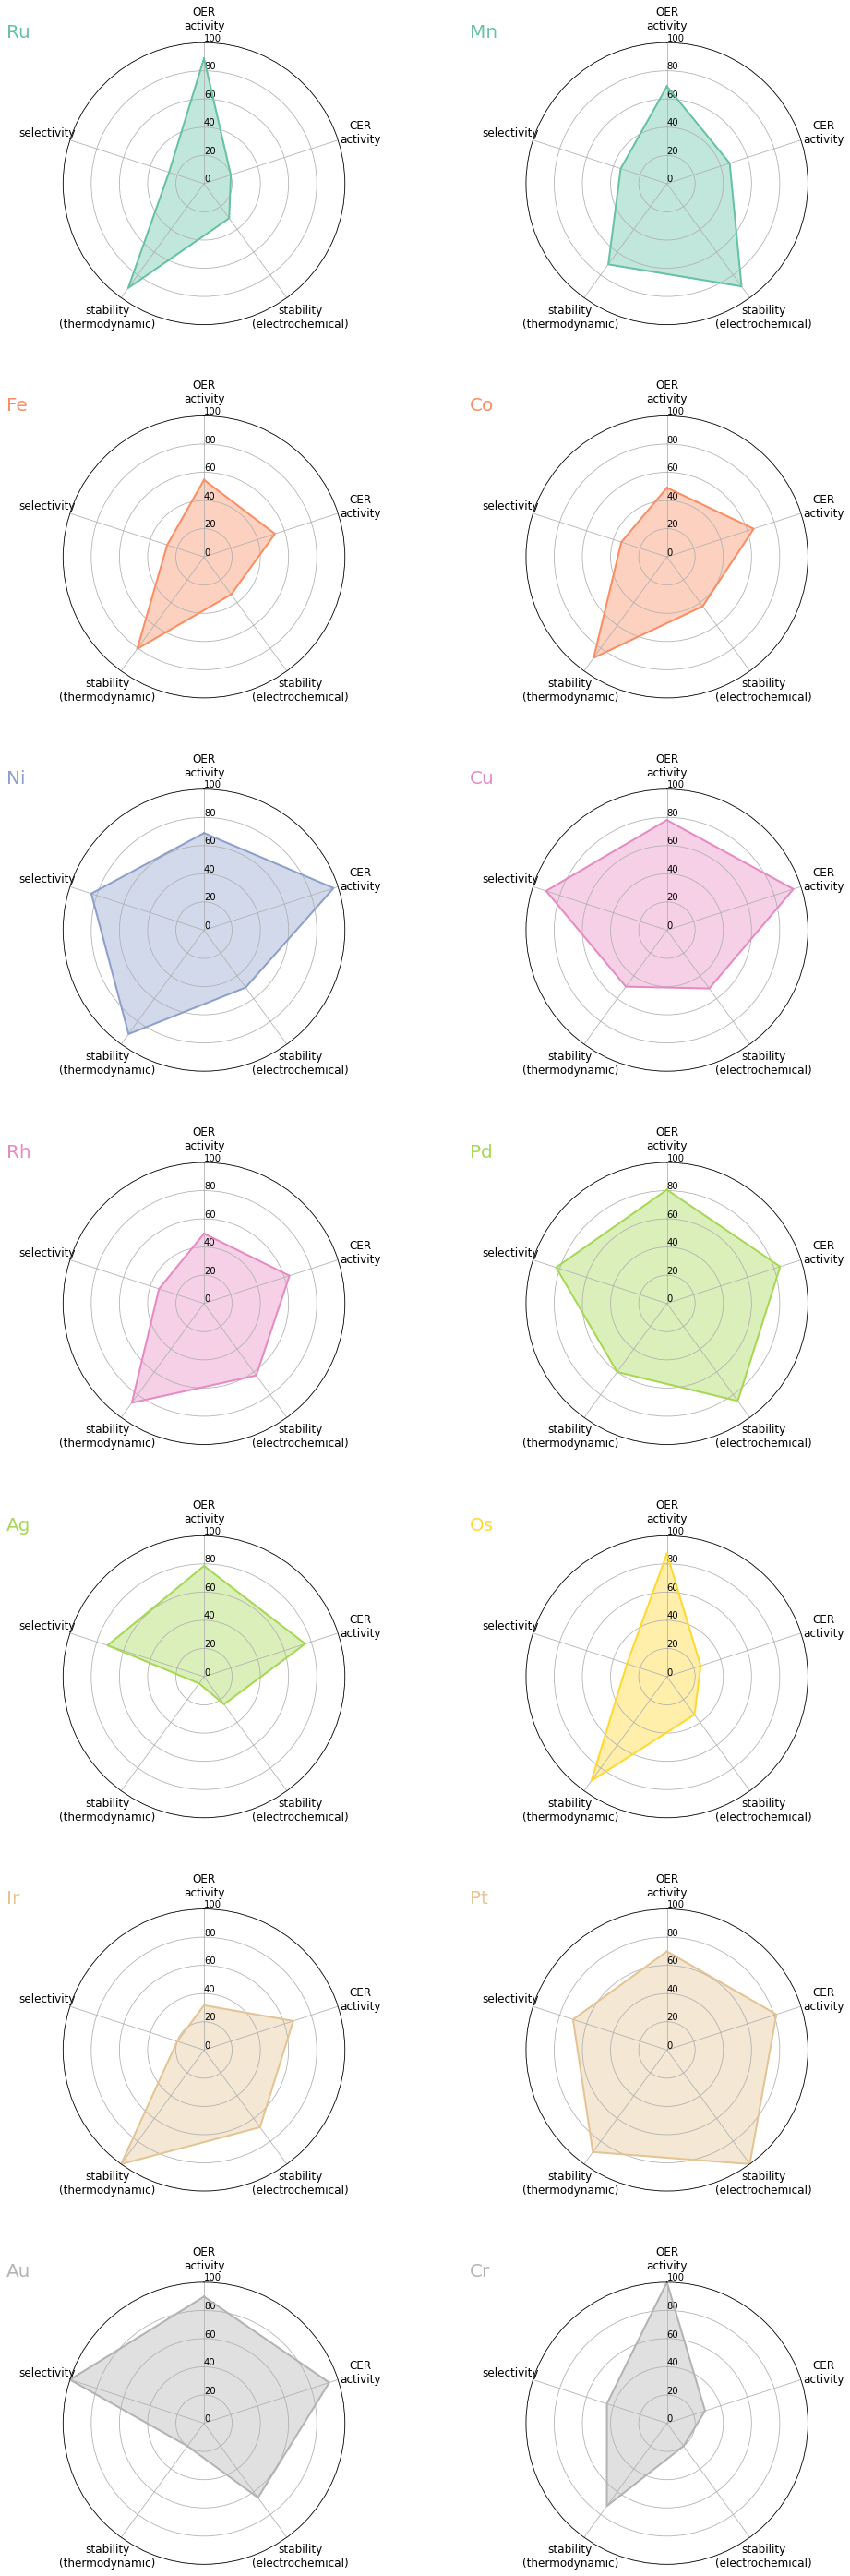

In [15]:

#labels = df.columns[1:]
labels = ['OER\nactivity','CER\nactivity','stability\n(electrochemical)','stability\n(thermodynamic)', 'selectivity']
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*np.pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,40))
fig.set_facecolor('white')
#print(df.iloc[0].drop('M').tolist())
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop(['M']).tolist()
    data += data[:1]
    
    ax = plt.subplot(7,2,i+1, polar=True)
    ax.set_theta_offset(np.pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=12) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,20,40,60,80,100],['0','20','40','60','80','100'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,100)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.M, size=20,color=color,x=-0.2, y=1, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()


